 for each trait - y-axis: P(high|first visible) other NOT visible - P(high|first visible) other visible, x-axis: questionnaire total scores

 for each trait - y-axis: P(win) other NOT visible - P(win) other visible, x-axis: questionnaire total scores

Plan:

p(H)
1. Get p(H) high first seen given other not visible
2. Get p(H) high first seen given other visible 
3. Compute difference
4. Compute questionnaire scores
5. Plot against questionnaire scores
6. Compute correlations


In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
import data_extraction.trial_list_filters as trial_list_filters
#import analysis.conditioned_player_choice as conditioned_player_choice
import conditioned_choice

In [3]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import globals
import data_extraction.get_indices as get_indices
import data_extraction.trial_list_filters as trial_list_filters
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

Prepare questionnaire data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import questionnaire_analysis.questionnaire_data.prepare_questionnaire_data as prepare_questionnaire_data

questionnaire_dict = {
    'AQ': "AQ_scores.csv", 
    'GAD': "GAD_scores.csv",
    'BIS': "BIS_scores.csv"
}
traits_dict = {
    'AQ': 10,  # AQ has 10 questions
    'GAD': 7,  # GAD has 7 questions
    'BIS': 8   # BIS has 8 questions
}

df = prepare_questionnaire_data.preprocess_data(questionnaire_dict, traits_dict)
print(df)

AQ_scores.csv
GAD_scores.csv
BIS_scores.csv


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions+1)]].sum(axis=1)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions

   Informazioni cronologiche_x              Indirizzo email_x First name_x                  Session identifier_x                name  session_id_x  player_id_x  AQ1  AQ2  AQ3  AQ4  AQ5  AQ6  AQ7  AQ8  AQ9  AQ10 Informazioni cronologiche_y              Indirizzo email_y First name_y                  Session identifier_y  player_id_y  session_id_y  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7 Informazioni cronologiche                Indirizzo email   First name                    Session identifier  session_id  player_id  BIS1  BIS2  BIS3  BIS4  BIS5  BIS6  BIS7  BIS8  AQ_total  GAD_total  BIS_total
1          19/11/2024 14.14.33             amykleyn@gmail.com     Agustina     2025-03-14_Session2_Host_Agustina             amy-vdk           2.0          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0         19/11/2024 14.15.44             amykleyn@gmail.com          Amy          2024-11-19_Session1_Host_Amy          0.0           2.0   1.0   1.0   1.0   0.0   1.0   1.0   0.0       19/

Merge questionnaires on player name

In [5]:
dfs={}
for questionnaire, path_to_questionnaire in questionnaire_dict.items():
    dfs[f'df_{questionnaire}']= pd.read_csv(path_to_questionnaire)

    df_merged = dfs[f'df_{list(questionnaire_dict.keys())[0]}']

for questionnaire in list(questionnaire_dict.keys())[1:]:
    df_merged = df_merged.iloc[:,:-1]
    df_merged = df_merged.merge(dfs[f'df_{questionnaire}'], on="name", how="outer")
    df_merged = df_merged.iloc[:,:-1]
    
df = df_merged.dropna()

for trait, num_questions in traits_dict.items():
    df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions+1)]].sum(axis=1)

print(df)

/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_11119/3905107160.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions+1)]].sum(axis=1)
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_11119/3905107160.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions+1)]].sum(axis=1)
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_11119/390510716

   Informazioni cronologiche_x              Indirizzo email_x First name_x                  Session identifier_x                name  session_id_x  player_id_x  AQ1  AQ2  AQ3  AQ4  AQ5  AQ6  AQ7  AQ8  AQ9  AQ10 Informazioni cronologiche_y              Indirizzo email_y First name_y                  Session identifier_y  player_id_y  session_id_y  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7 Informazioni cronologiche                Indirizzo email   First name                    Session identifier  session_id  player_id  BIS1  BIS2  BIS3  BIS4  BIS5  BIS6  BIS7  BIS8  AQ_total  GAD_total  BIS_total
1          19/11/2024 14.14.33             amykleyn@gmail.com     Agustina     2025-03-14_Session2_Host_Agustina             amy-vdk           2.0          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0         19/11/2024 14.15.44             amykleyn@gmail.com          Amy          2024-11-19_Session1_Host_Amy          0.0           2.0   1.0   1.0   1.0   0.0   1.0   1.0   0.0       19/

Define variables for questionnaire data

In [6]:
session_ids = np.array(df['session_id'], dtype=int)
names = list(df['First name'])
player_ids = np.array(df['player_id'], dtype=int)

BIS_totals = {}
BIS_total = list(df['BIS_total'])
for name, total in zip(names, BIS_total):
    BIS_totals[name] = total
print(BIS_totals)

GAD_totals = {}
GAD_total = list(df['GAD_total'])
for name, total in zip(names, GAD_total):
    GAD_totals[name] = total
print(GAD_totals)

AQ_totals = {}
AQ_total = list(df['AQ_total'])
for name, total in zip(names, AQ_total):
    AQ_totals[name] = total
print(AQ_totals)

{'Amy': 21.0, 'Christopher': 19.0, 'Dominic': 19.0, 'Esther': 16.0, 'Francesca': 20.0, 'Gaia': 21.0, 'Hocine': 17.0, 'Hoi': 17.0, 'Natalie': 19.0, 'Isabel': 17.0, 'Jason': 17.0, 'Jessica': 18.0, 'Jingjing': 19.0, 'Juyoung': 20.0, 'Kalie': 23.0, 'Khadija': 20.0, 'Kirtan': 19.0, 'Marco': 20.0, 'Marian': 25.0, 'Nasia': 22.0, 'Rachelle': 14.0, 'Rahul': 20.0, 'Rose': 20.0, 'Ruiqing': 22.0, 'Ryand': 19.0, 'Ryank': 21.0, 'Sara': 17.0, 'SenSze': 18.0, 'Yeung': 19.0, 'Sophia': 19.0, 'Taqwa': 16.0, 'Tas': 20.0, 'Vince': 19.0, 'Wendy': 19.0, 'WenYan': 19.0, 'Xinyuan': 20.0, 'Yichuan': 22.0, 'Yixuan': 18.0, 'YuChun': 21.0, 'Sunny': 19.0}
{'Amy': 5.0, 'Christopher': 6.0, 'Dominic': 2.0, 'Esther': 4.0, 'Francesca': 1.0, 'Gaia': 2.0, 'Hocine': 2.0, 'Hoi': 4.0, 'Natalie': 0.0, 'Isabel': 2.0, 'Jason': 0.0, 'Jessica': 1.0, 'Jingjing': 7.0, 'Juyoung': 12.0, 'Kalie': 11.0, 'Khadija': 6.0, 'Kirtan': 0.0, 'Marco': 0.0, 'Marian': 9.0, 'Nasia': 15.0, 'Rachelle': 5.0, 'Rahul': 1.0, 'Rose': 0.0, 'Ruiqing': 2.0,

In [7]:
import glob
import os

# Define the data folder
data_folder = r'/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions'

# Find all JSON session files
all_json_files = glob.glob(os.path.join(data_folder, "session_*/*.json"))
print(all_json_files)

# Dictionary to map session IDs to player names
session_players_dict = {}

for session_file in all_json_files:
    session_id = os.path.basename(os.path.dirname(session_file)).replace("session_", "")
    if f"session_{session_id}" in session_file and "Solo" in session_file:

        # Extract the player name(s) from the filename
        raw_name = os.path.basename(session_file).split("_")[2]  # Assuming name is the 4th element
        player_name = raw_name.replace("FirstSolo.json", "").replace("SecondSolo.json", "")

        # Store the mapping (session_id → player name)
        if session_id not in session_players_dict:
            session_players_dict[session_id] = []
        session_players_dict[session_id].append(player_name)

# Debug: print session-player mapping
print(session_players_dict)


['/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_5/2024-11-20_15-39-49_VinceSecondSolo.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_5/2024-11-20_15-10-17_VinceFirstSolo.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_5/2024-11-20_15-40-08_SunnySecondSolo.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_5/2024-11-20_15-10-00_SunnyFirstSolo.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_5/2024-11-20_15-16-21_SunnyVinceSocial.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_15/2025-01-15_15-12-39_MarcoFirstSolo.json', '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_15/2025-01-15_15-46-04_MarcoSecondSolo.json', '/Users/benny/Desktop/MSc/

In [8]:
json_solos = []

# recursively find all JSON files in the data folder
all_json_files = glob.glob(os.path.join(data_folder, "session_*/*.json"))
#debug
#print(all_json_files)

for session_id, name in zip(session_ids, names):
    #debug
    #print(name)
    #print(session_id)
    matching_files = [
        os.path.relpath(f, data_folder)
        for f in all_json_files
        if f"session_{session_id}" in f and name in f and "Solo" in f
    ]
    #debug
    #print(matching_files)

    json_solos.extend(matching_files)

In [9]:
json_socials = set()  # Use a set instead of a list

# Get all JSON files from the data folder
all_json_files = glob.glob(os.path.join(data_folder, "session_*/*.json"))

for session_id, name in zip(session_ids, names):
    matching_files = {
        os.path.relpath(f, data_folder)  # Convert to relative path
        for f in all_json_files
        if f"session_{session_id}" in f and name in f and "Social" in f
    }
    
    json_socials.update(matching_files)  # Add to set

# Convert back to a sorted list
json_socials = sorted(json_socials)

len(json_socials)

20

In [10]:
import re

# Function to extract session number from filename
def extract_session_number(filename):
    match = re.search(r'session_(\d+)', filename)
    return int(match.group(1)) if match else -1  # -1 for safety if not found

# Sort by session number
json_solos_sorted = sorted(json_solos, key=extract_session_number)
json_socials_sorted = sorted(json_socials, key=extract_session_number)


In [12]:
json_filenames = {}

for json_filename in json_solos_sorted:
    for name in names:
        if name in json_filename:
            if name not in json_filenames:
                json_filenames[name] = []
            json_filenames[name].append(json_filename)

json_filenames = list(json_filenames.values())

print(json_filenames)

[['session_0/2024-11-13_14-12-43_NasiaFirstSolo.json', 'session_0/2024-11-13_14-37-06_NasiaSecondSolo.json'], ['session_0/2024-11-13_14-37-20_RyandSecondSolo.json', 'session_0/2024-11-13_14-12-41_RyandFirstSolo.json'], ['session_1/2024-11-13_15-21-50_HoiFirstSolo.json', 'session_1/2024-11-13_15-51-16_HoiSecondSolo.json'], ['session_1/2024-11-13_15-22-20_YichuanFirstSolo.json', 'session_1/2024-11-13_15-51-39_YichuanSecondSolo.json'], ['session_2/2024-11-19_14-18-18_AmyFirstSolo.json', 'session_2/2024-11-19_14-44-00_AmySecondSolo.json'], ['session_2/2024-11-19_14-18-44_XinyuanFirstSolo.json', 'session_2/2024-11-19_14-44-31_XinyuanSecondSolo.json'], ['session_3/2024-11-19_15-14-19_HocineFirstSolo.json', 'session_3/2024-11-19_15-47-29_HocineSecondSolo.json'], ['session_3/2024-11-19_15-15-53_SophiaFirstSolo.json', 'session_3/2024-11-19_15-47-53_SophiaSecondSolo.json'], ['session_4/2024-11-20_14-12-06_JasonFirstSolo.json', 'session_4/2024-11-20_14-42-16_JasonSecondSolo.json'], ['session_4/20

In [13]:
df_solos, trial_lists_solos = prepare_data.prepare_data(data_folder, json_solos_sorted, combine=False)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_0/2024-11-13_14-12-43_NasiaFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_0/2024-11-13_14-37-06_NasiaSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_0/2024-11-13_14-37-20_RyandSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_0/2024-11-13_14-12-41_RyandFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_1/2024-11-13_15-21-50_HoiFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/qu

In [14]:
df_social, trial_lists_social = prepare_data.prepare_data(data_folder, json_socials_sorted, combine=False)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_0/2024-11-13_14-18-54_NasiaRyandSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_1/2024-11-13_15-28-07_YichuanHoiSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_2/2024-11-19_14-24-49_AmyXinyuanSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_3/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/sessions/session_4/2024-11-20_14-17-44_JasonRahulSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/

Compute probabilities (p(H))

In [ ]:
# variables
inferred_choice = True
current_fov = 110
chosen_wall_index = 0
visible_wall_index = 0
wall_initial_vis_only = True
other_visible = True
inverse_other_visible = True
wall_sep = None
solo = False
data_size_cutoff = 6

In [17]:
# Compute probabilities
# Other visible
# High first visible
probabilities1_social, numerator1_social, denominator1_social = conditioned_choice.probability_trial_outcome_given_conditions_all_sessions(
    trial_lists_social, inferred_choice=inferred_choice, current_fov=current_fov, chosen_wall_index=chosen_wall_index, visible_wall_index=visible_wall_index, 
    other_visible=other_visible, wall_initial_vis_only=wall_initial_vis_only, solo=solo, wall_sep=wall_sep, 
    inverse_other_visible=inverse_other_visible, trial_type=globals.HIGH_LOW, data_size_cutoff=data_size_cutoff, debug=False
)

/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty

fewer than 6 trials in the denominator, returning np.nan instead of probability
fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability
fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

In [21]:
# Compute probabilities
# Other not visible
# High first visible
probabilities2_social, numerator2_social, denominator1_social = conditioned_choice.probability_trial_outcome_given_conditions_all_sessions(
    trial_lists_social, inferred_choice=inferred_choice, current_fov=current_fov, chosen_wall_index=chosen_wall_index, visible_wall_index=visible_wall_index, 
    other_visible=other_visible, wall_initial_vis_only=wall_initial_vis_only, solo=solo, wall_sep=wall_sep, 
    inverse_other_visible=inverse_other_visible, trial_type=globals.HIGH_LOW, data_size_cutoff=data_size_cutoff, debug=False
)

/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repo

fewer than 6 trials in the denominator, returning np.nan instead of probability


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:324: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)


In [24]:
import re

probabilities1_social_dict = {}

def split_two_names(concatenated_name):
    capitals = [m.start() for m in re.finditer(r'[A-Z]', concatenated_name)][1:]
    if not capitals:
        return [concatenated_name]
    split_index = capitals[-1]
    return [concatenated_name[:split_index], concatenated_name[split_index:]]

for i, file in enumerate(json_socials_sorted):
    filename = file.split('/')[-1].replace('.json', '')
    # filename looks like: '2024-11-13_14-18-54_NasiaRyanDSocial'
    parts = filename.split('_')
    # parts: [ '2024-11-13', '14-18-54', 'NasiaRyanDSocial' ]
    combined_names = parts[-1].replace('Social', '')
    
    name1, name2 = split_two_names(combined_names)
        
    prob1 = probabilities1_social[i][0]
    prob2 = probabilities1_social[i][1]
    
    probabilities1_social_dict[name1] = prob1
    probabilities1_social_dict[name2] = prob2

print(probabilities1_social_dict)

{'Nasia': np.float64(1.0), 'Ryand': np.float64(1.0), 'Yichuan': np.float64(0.875), 'Hoi': np.float64(0.7142857142857143), 'Amy': np.float64(nan), 'Xinyuan': np.float64(nan), 'Sophia': np.float64(0.625), 'Hocine': np.float64(nan), 'Jason': np.float64(0.7777777777777778), 'Rahul': np.float64(0.9090909090909091), 'Sunny': np.float64(0.5), 'Vince': np.float64(0.7777777777777778), 'Esther': np.float64(0.8888888888888888), 'Bowim': np.float64(nan), 'Taqwa': np.float64(nan), 'Tas': np.float64(1.0), 'Ryank': np.float64(0.875), 'Rose': np.float64(0.75), 'Khadija': np.float64(1.0), 'Wendy': np.float64(nan), 'FrancescaSen': np.float64(0.9090909090909091), 'Sze': np.float64(0.4444444444444444), 'Jingjing': np.float64(0.8571428571428571), 'Yeung': np.float64(0.4166666666666667), 'Kirtan': np.float64(0.2857142857142857), 'Christopher': np.float64(0.5), 'Yixuan': np.float64(nan), 'Marco': np.float64(nan), 'YuChun': np.float64(nan), 'Ruiqing': np.float64(0.4), 'Isabel': np.float64(nan), 'Juyoung': np.

In [25]:
probabilities2_social_dict = {}

def split_two_names(concatenated_name):
    capitals = [m.start() for m in re.finditer(r'[A-Z]', concatenated_name)][1:]
    if not capitals:
        return [concatenated_name]
    split_index = capitals[-1]
    return [concatenated_name[:split_index], concatenated_name[split_index:]]

for i, file in enumerate(json_socials_sorted):
    filename = file.split('/')[-1].replace('.json', '')
    # filename looks like: '2024-11-13_14-18-54_NasiaRyanDSocial'
    parts = filename.split('_')
    # parts: [ '2024-11-13', '14-18-54', 'NasiaRyanDSocial' ]
    combined_names = parts[-1].replace('Social', '')
    
    name1, name2 = split_two_names(combined_names)
        
    prob1 = probabilities2_social[i][0]
    prob2 = probabilities2_social[i][1]
    
    probabilities2_social_dict[name1] = prob1
    probabilities2_social_dict[name2] = prob2

print(probabilities2_social_dict)

{'Nasia': np.float64(1.0), 'Ryand': np.float64(0.7391304347826086), 'Yichuan': np.float64(0.8235294117647058), 'Hoi': np.float64(0.782608695652174), 'Amy': np.float64(0.6666666666666666), 'Xinyuan': np.float64(0.7619047619047619), 'Sophia': np.float64(1.0), 'Hocine': np.float64(0.8), 'Jason': np.float64(1.0), 'Rahul': np.float64(0.9375), 'Sunny': np.float64(0.7777777777777778), 'Vince': np.float64(0.8235294117647058), 'Esther': np.float64(1.0), 'Bowim': np.float64(0.95), 'Taqwa': np.float64(0.8888888888888888), 'Tas': np.float64(0.8666666666666667), 'Ryank': np.float64(0.9444444444444444), 'Rose': np.float64(0.9), 'Khadija': np.float64(nan), 'Wendy': np.float64(0.9166666666666666), 'FrancescaSen': np.float64(1.0), 'Sze': np.float64(0.8888888888888888), 'Jingjing': np.float64(1.0), 'Yeung': np.float64(0.7272727272727273), 'Kirtan': np.float64(nan), 'Christopher': np.float64(0.5454545454545454), 'Yixuan': np.float64(1.0), 'Marco': np.float64(0.9523809523809523), 'YuChun': np.float64(0.83

In [51]:
#other NOT visible - other visible
difference_other_vis_dict = {
    key: probabilities2_social_dict[key] - probabilities1_social_dict[key]
    for key in probabilities2_social_dict.keys()
}
print(difference_other_vis_dict)

{'Nasia': np.float64(0.0), 'Ryand': np.float64(-0.26086956521739135), 'Yichuan': np.float64(-0.05147058823529416), 'Hoi': np.float64(0.06832298136645965), 'Amy': np.float64(nan), 'Xinyuan': np.float64(nan), 'Sophia': np.float64(0.375), 'Hocine': np.float64(nan), 'Jason': np.float64(0.2222222222222222), 'Rahul': np.float64(0.02840909090909094), 'Sunny': np.float64(0.2777777777777778), 'Vince': np.float64(0.04575163398692805), 'Esther': np.float64(0.11111111111111116), 'Bowim': np.float64(nan), 'Taqwa': np.float64(nan), 'Tas': np.float64(-0.1333333333333333), 'Ryank': np.float64(0.06944444444444442), 'Rose': np.float64(0.15000000000000002), 'Khadija': np.float64(nan), 'Wendy': np.float64(nan), 'FrancescaSen': np.float64(0.09090909090909094), 'Sze': np.float64(0.4444444444444444), 'Jingjing': np.float64(0.1428571428571429), 'Yeung': np.float64(0.3106060606060606), 'Kirtan': np.float64(nan), 'Christopher': np.float64(0.045454545454545414), 'Yixuan': np.float64(nan), 'Marco': np.float64(nan

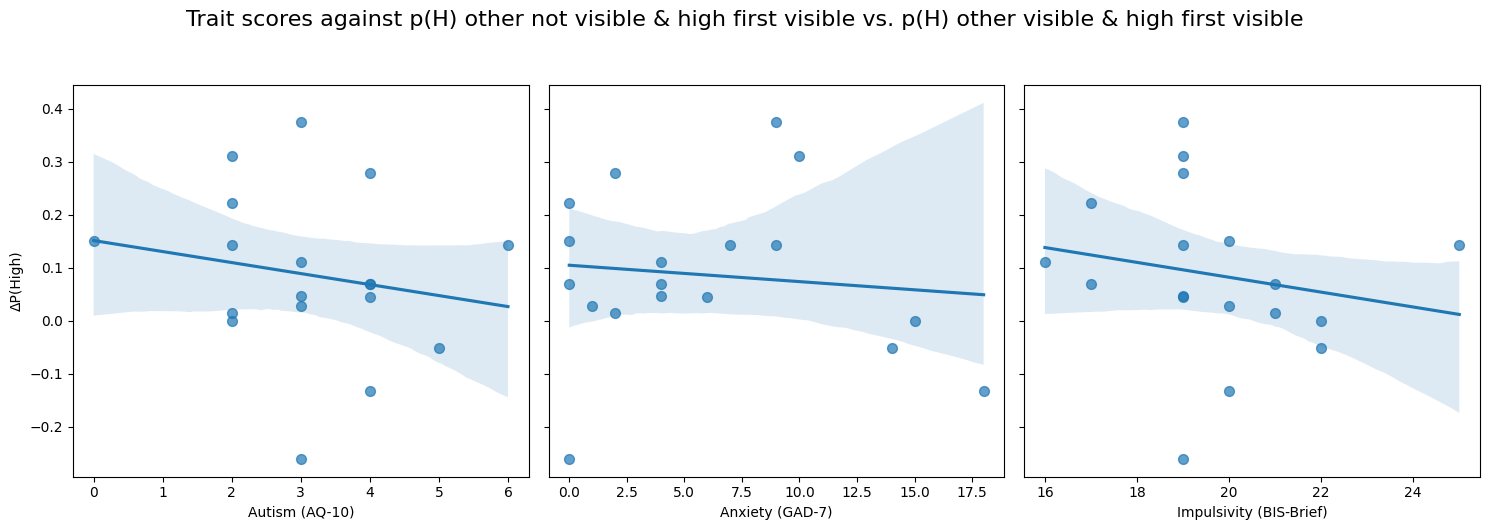

In [52]:

# define plot labels and dictionary references
traits = ["Autism (AQ-10)", "Anxiety (GAD-7)", "Impulsivity (BIS-Brief)"]
scores_dicts = [AQ_totals, GAD_totals, BIS_totals]  # Dictionary of scores for each questionnaire

# set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# iterate through each trait and corresponding scores dictionary
for i, (trait, score_dict) in enumerate(zip(traits, scores_dicts)):

    # Get overlapping names between solo_p_high and score_dict
    common_names = set(difference_other_vis_dict.keys()).intersection(score_dict.keys())

    # Extract values for common names
    x_values = [score_dict[name] for name in common_names]
    y_values = [difference_other_vis_dict[name] for name in common_names]

    # Plot regression
    sns.regplot(x=x_values, y=y_values, ax=axes[i], scatter_kws={'s': 50, 'alpha': 0.7})
    axes[i].set_xlabel(trait)
    axes[i].set_ylabel("ΔP(High)" if i == 0 else "")

fig.suptitle("Trait scores against p(H) other not visible & high first visible vs. p(H) other visible & high first visible", fontsize=16, y=1.05)


# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [53]:
import scipy.stats as stats

# iterate through each trait and corresponding scores dictionary
for trait, score_dict in zip(traits, scores_dicts):

    # Get overlapping names between solo_p_high and score_dict
    common_names = set(difference_other_vis_dict.keys()).intersection(score_dict.keys())

    # Extract values for common names
    x_values = [score_dict[name] for name in common_names]
    y_values = [difference_other_vis_dict[name] for name in common_names]
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Filter out pairs where either is nan
    mask = ~np.isnan(x_values) & ~np.isnan(y_values)
    x_values = x_values[mask]
    y_values = y_values[mask]



    # Compute Pearson correlation and p-value
    if len(x_values) > 1:  # Need at least 2 data points for correlation
        r, p = stats.pearsonr(x_values, y_values)

        # Print correlation results
        print(f"{trait}: Pearson r = {r:.3f}, p-value = {p:.3f}")

        # Interpretation
        if p < 0.05:
            print(f"Significant (p < 0.05)")
        else:
            print(f"Not significant (p >= 0.05)")
    else:
        print(f"{trait}: Not enough data for correlation analysis.")

Autism (AQ-10): Pearson r = -0.183, p-value = 0.466
Not significant (p >= 0.05)
Anxiety (GAD-7): Pearson r = -0.112, p-value = 0.658
Not significant (p >= 0.05)
Impulsivity (BIS-Brief): Pearson r = -0.189, p-value = 0.452
Not significant (p >= 0.05)


p(Win)
1. Get p(W) other not visible
2. Get p(W) other visible
3. Compute difference
4. Plot against questionnaire scores
5. Compute correlations

In [34]:
import other_visible_functions

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [36]:
# P(Win | Other visible)
# combined player_ids 1 and 0, for all sessions

wall_sep=None
trial_type = globals.HIGH_LOW
e = np.full(len(trial_lists_social)*2, np.nan)
f = np.full(len(trial_lists_social)*2, np.nan)
trial_list_index = 0
inferred_choice=False
debug=True
current_fov = 110

for i in range(0,len(trial_lists_social)*2, 2):

    trial_list = trial_lists_social[trial_list_index]

    # filter trial list for HighLow trialtype
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
    trial_list_filtered = [trial_list[i] for i in trial_indices]

    player_id = 0
    # get Other visibility for this trial list
    orientation_angle_to_other_session = other_visible_functions.get_angle_of_opponent_from_player_session(player_id, trial_list_filtered)
    other_visible_session = other_visible_functions.get_other_visible_session(orientation_angle_to_other_session, current_fov)
    
    e[i] = other_visible_functions.probability_win_trial_conditioned_on_other_visibility(trial_list_filtered, other_visible_session,
                                                                 player_id,
                                                                 inverse_other_visible=False, debug=debug)
    f[i] = other_visible_functions.probability_win_trial_conditioned_on_other_visibility(trial_list_filtered, other_visible_session,
                                                                 player_id,
                                                                 inverse_other_visible=True, debug=debug)
    
    player_id = 1
    # get Other visibility for this trial list
    orientation_angle_to_other_session = other_visible_functions.get_angle_of_opponent_from_player_session(player_id, trial_list_filtered)
    other_visible_session = other_visible_functions.get_other_visible_session(orientation_angle_to_other_session, current_fov)
    
    e[i+1] = other_visible_functions.probability_win_trial_conditioned_on_other_visibility(trial_list_filtered, other_visible_session,
                                                                   player_id,
                                                                   inverse_other_visible=False, debug=debug)
    f[i+1] = other_visible_functions.probability_win_trial_conditioned_on_other_visibility(trial_list_filtered, other_visible_session,
                                                                   player_id,
                                                                   inverse_other_visible=True, debug=debug)
    
    trial_list_index += 1
    
    
wall_choice_probabilities3 = [e,f]

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis
Next session, player_id 0
Len other_visible_trial_indices: 24
Len trial_list_filtered_this_player_wins: 12
Len other_visible_trial_indices: 24
Probability player wins given these conditions: 0.5
Next session, player_id 0
Len other_visible_trial_indices: 69
Len trial_list_filtered_this_player_wins: 36
Len other_visible_trial_indices: 69
Probability player wins given these conditions: 0.5217391304347826
Next session, player_id 1
Len other_visible_trial_indices: 27
Len trial_list_filtered_this_player_wins: 14
Len other_visible_trial_indices: 27
Probability player wins given these conditions: 0.5185185185185185
Next session, player_id 1
Len other_visible_trial_indices: 66
Len trial_list_filtered_this_player_wins: 31
Len other_visible_trial_indices: 66
Probability player wins given these conditions: 0.4696969696969697
Next session, player_id 0
Len other_v

In [46]:
print(wall_choice_probabilities3)

[array([0.5       , 0.51851852, 0.2972973 , 0.76190476, 0.33333333,
       0.46428571, 0.6969697 , 0.15555556, 0.23214286, 0.73076923,
       0.35      , 0.675     , 0.43333333, 0.21428571, 0.36666667,
       0.51219512, 0.3125    , 0.31578947, 0.37037037, 0.59090909,
       0.78378378, 0.1627907 , 0.40625   , 0.5       , 0.65625   ,
       0.3       , 0.34375   , 0.63888889, 0.18918919, 0.76842105,
       0.69230769, 0.15384615, 0.48484848, 0.48780488, 0.06451613,
       0.9137931 , 0.28571429, 0.57831325, 0.36      , 0.55172414]), array([0.52173913, 0.46969697, 0.40277778, 0.60227273, 0.34782609,
       0.73846154, 0.76923077, 0.33962264, 0.35294118, 0.68055556,
       0.34177215, 0.64556962, 0.58461538, 0.50617284, 0.4375    ,
       0.62318841, 0.59036145, 0.57142857, 0.56521739, 0.56363636,
       0.75      , 0.3       , 0.47560976, 0.61363636, 0.75      ,
       0.4       , 0.33802817, 0.67164179, 0.25      , 0.78571429,
       0.86666667, 0.28571429, 0.47435897, 0.54285714, 0.13

e = array of "P(win | other visible)" for each player and each session.
f = array of "P(win | other not visible)" for each player and each session.

-> wall_choice_probabilities3[0] is all P(win | other visible) values, and wall_choice_probabilities3[1] is all P(win | other not visible) values.

Even indices (0, 2, 4, ...) —> Player 0 for each session
Odd indices (1, 3, 5, ...) —> Player 1 for each session

In [48]:
import re

pwin_visible_dict = {}
pwin_not_visible_dict = {}

def split_two_names(concatenated_name):
    capitals = [m.start() for m in re.finditer(r'[A-Z]', concatenated_name)][1:]
    if not capitals:
        return [concatenated_name]
    split_index = capitals[-1]
    return [concatenated_name[:split_index], concatenated_name[split_index:]]

# Index through each session by pairs of probabilities
for i, file in enumerate(json_socials_sorted):
    filename = file.split('/')[-1].replace('.json', '')
    parts = filename.split('_')
    combined_names = parts[-1].replace('Social', '')

    name1, name2 = split_two_names(combined_names)

    # player 0 = even index, player 1 = odd index
    player0_idx = i * 2
    player1_idx = i * 2 + 1

    pwin_visible_dict[name1] = wall_choice_probabilities3[0][player0_idx]
    pwin_visible_dict[name2] = wall_choice_probabilities3[0][player1_idx]

    pwin_not_visible_dict[name1] = wall_choice_probabilities3[1][player0_idx]
    pwin_not_visible_dict[name2] = wall_choice_probabilities3[1][player1_idx]

print(pwin_visible_dict)
print(pwin_not_visible_dict)


{'Nasia': np.float64(0.5), 'Ryand': np.float64(0.5185185185185185), 'Yichuan': np.float64(0.2972972972972973), 'Hoi': np.float64(0.7619047619047619), 'Amy': np.float64(0.3333333333333333), 'Xinyuan': np.float64(0.4642857142857143), 'Sophia': np.float64(0.696969696969697), 'Hocine': np.float64(0.15555555555555556), 'Jason': np.float64(0.23214285714285715), 'Rahul': np.float64(0.7307692307692307), 'Sunny': np.float64(0.35), 'Vince': np.float64(0.675), 'Esther': np.float64(0.43333333333333335), 'Bowim': np.float64(0.21428571428571427), 'Taqwa': np.float64(0.36666666666666664), 'Tas': np.float64(0.5121951219512195), 'Ryank': np.float64(0.3125), 'Rose': np.float64(0.3157894736842105), 'Khadija': np.float64(0.37037037037037035), 'Wendy': np.float64(0.5909090909090909), 'FrancescaSen': np.float64(0.7837837837837838), 'Sze': np.float64(0.16279069767441862), 'Jingjing': np.float64(0.40625), 'Yeung': np.float64(0.5), 'Kirtan': np.float64(0.65625), 'Christopher': np.float64(0.3), 'Yixuan': np.flo

In [49]:
#other NOT visible - other visible
difference_other_vis_wins_dict = {
    key: pwin_not_visible_dict[key] - pwin_visible_dict[key]
    for key in pwin_not_visible_dict.keys()
}
print(difference_other_vis_wins_dict)

{'Nasia': np.float64(0.021739130434782594), 'Ryand': np.float64(-0.048821548821548766), 'Yichuan': np.float64(0.10548048048048048), 'Hoi': np.float64(-0.15963203463203457), 'Amy': np.float64(0.014492753623188415), 'Xinyuan': np.float64(0.2741758241758242), 'Sophia': np.float64(0.07226107226107226), 'Hocine': np.float64(0.18406708595387838), 'Jason': np.float64(0.12079831932773111), 'Rahul': np.float64(-0.050213675213675146), 'Sunny': np.float64(-0.008227848101265811), 'Vince': np.float64(-0.02943037974683549), 'Esther': np.float64(0.1512820512820513), 'Bowim': np.float64(0.29188712522045857), 'Taqwa': np.float64(0.07083333333333336), 'Tas': np.float64(0.11099328384588192), 'Ryank': np.float64(0.27786144578313254), 'Rose': np.float64(0.2556390977443609), 'Khadija': np.float64(0.19484702093397743), 'Wendy': np.float64(-0.027272727272727337), 'FrancescaSen': np.float64(-0.03378378378378377), 'Sze': np.float64(0.13720930232558137), 'Jingjing': np.float64(0.06935975609756095), 'Yeung': np.f

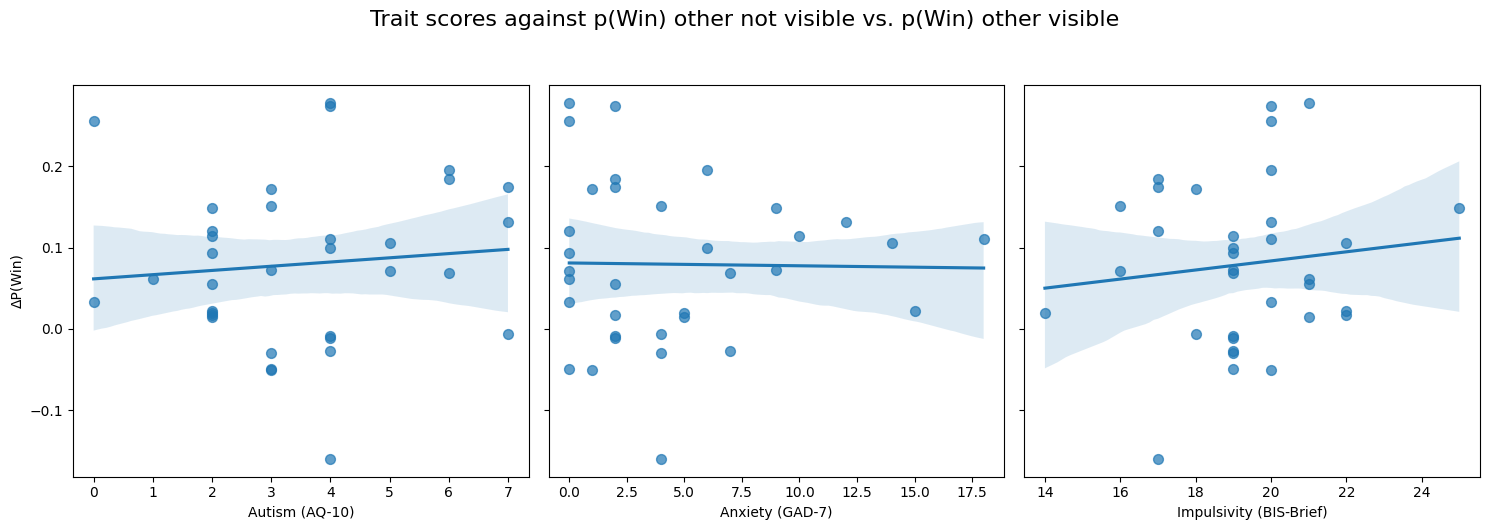

In [55]:
# define plot labels and dictionary references
traits = ["Autism (AQ-10)", "Anxiety (GAD-7)", "Impulsivity (BIS-Brief)"]
scores_dicts = [AQ_totals, GAD_totals, BIS_totals]  # Dictionary of scores for each questionnaire

# set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# iterate through each trait and corresponding scores dictionary
for i, (trait, score_dict) in enumerate(zip(traits, scores_dicts)):

    # Get overlapping names between solo_p_high and score_dict
    common_names = set(difference_other_vis_wins_dict.keys()).intersection(score_dict.keys())

    # Extract values for common names
    x_values = [score_dict[name] for name in common_names]
    y_values = [difference_other_vis_wins_dict[name] for name in common_names]

    # Plot regression
    sns.regplot(x=x_values, y=y_values, ax=axes[i], scatter_kws={'s': 50, 'alpha': 0.7})
    axes[i].set_xlabel(trait)
    axes[i].set_ylabel("ΔP(Win)" if i == 0 else "")

fig.suptitle("Trait scores against p(Win) other not visible vs. p(Win) other visible", fontsize=16, y=1.05)


# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [54]:
import scipy.stats as stats

# iterate through each trait and corresponding scores dictionary
for trait, score_dict in zip(traits, scores_dicts):

    # Get overlapping names between solo_p_high and score_dict
    common_names = set(difference_other_vis_wins_dict.keys()).intersection(score_dict.keys())

    # Extract values for common names
    x_values = [score_dict[name] for name in common_names]
    y_values = [difference_other_vis_wins_dict[name] for name in common_names]
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Filter out pairs where either is nan
    mask = ~np.isnan(x_values) & ~np.isnan(y_values)
    x_values = x_values[mask]
    y_values = y_values[mask]



    # Compute Pearson correlation and p-value
    if len(x_values) > 1:  # Need at least 2 data points for correlation
        r, p = stats.pearsonr(x_values, y_values)

        # Print correlation results
        print(f"{trait}: Pearson r = {r:.3f}, p-value = {p:.3f}")

        # Interpretation
        if p < 0.05:
            print(f"Significant (p < 0.05)")
        else:
            print(f"Not significant (p >= 0.05)")
    else:
        print(f"{trait}: Not enough data for correlation analysis.")

Autism (AQ-10): Pearson r = 0.097, p-value = 0.584
Not significant (p >= 0.05)
Anxiety (GAD-7): Pearson r = -0.017, p-value = 0.925
Not significant (p >= 0.05)
Impulsivity (BIS-Brief): Pearson r = 0.118, p-value = 0.506
Not significant (p >= 0.05)
